<a href="https://colab.research.google.com/github/infiniteoverflow/Translate-and-TTS/blob/master/Translate_and_TTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install easyocr

     |████████████████████████████████| 48.4MB 59kB/s 


In [2]:
!pip install gTTS

  Created wheel for gtts-token: filename=gTTS_token-1.1.3-cp36-none-any.whl size=4097 sha256=5a1a1840dcb8553fc2f2f44260eada12701788dee334e25465187ce28babd2d5
  Stored in directory: /root/.cache/pip/wheels/dd/11/61/33f7e51bf545e910552b2255eead2a7cd8ef54064b46dceb34
Successfully built gtts-token


In [3]:
!pip install googletrans

     |████████████████████████████████| 61kB 5.5MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 942kB 12.7MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
     |████████████████████████████████| 71kB 10.2MB/s 
     |████████████████████████████████| 102kB 12.2MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=5f0efa917ae7df976150bf792ea3221b019cd6c3822f74a780eb5da23aa970fd
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=1895a55a02e972b9afab61e2df541f071d19e4ef61eae9beee2d109bf2e31d77
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [4]:
from googletrans import Translator
import easyocr
from gtts import gTTS
from IPython.display import Audio

In [5]:
reader = easyocr.Reader(['hi'])
translator = Translator()

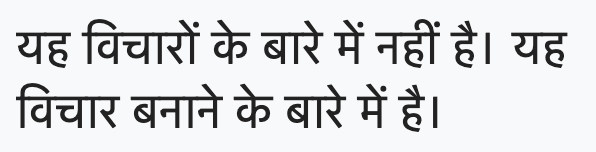

In [26]:
import PIL
from PIL import ImageDraw

image_path = '/content/hindi_quote.png'

im = PIL.Image.open(image_path)
im

In [27]:
bounds = reader.readtext(
    image_path,
    add_margin = 0.4,
    width_ths = 0.7,
    link_threshold = 0.8,
    decoder = 'beamsearch',
    blocklist='=-',
    detail=1,
)

bounds

[([[0, 0], [589, 0], [589, 93], [0, 93]],
  'यह विचारों के बारे में नहीं है। यह',
  0.02165987342596054),
 ([[0, 58], [467, 58], [467, 152], [0, 152]],
  'विचार बनाने के बारे में है।',
  0.02288789115846157)]

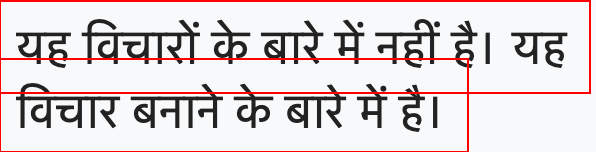

In [28]:
def draw_boxes(image,bounds,color='red',width=2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0,p1,p2,p3 = bound[0]
    draw.line([*p0,*p1,*p2,*p3,*p0],fill=color,width=width)
  return image

draw_boxes(im,bounds)

In [29]:
## Remove Bounding box details

text_list = reader.readtext(
    image_path,
    add_margin = 0.4,
    width_ths = 0.7,
    link_threshold = 0.8,
    decoder = 'beamsearch',
    blocklist='=-',
    detail=0,
)

text_list

['यह विचारों के बारे में नहीं है। यह', 'विचार बनाने के बारे में है।']

In [30]:
text_comb = ' '.join(text_list)
text_comb

'यह विचारों के बारे में नहीं है। यह विचार बनाने के बारे में है।'

In [31]:
print(translator.detect(text_comb))

Detected(lang=hi, confidence=1.0)


In [32]:
text_en = translator.translate(text_comb,src='hi')
print(text_en.text)

It is not about ideas. It is about creating ideas.


In [33]:
en_tts = gTTS(text_en.text)
en_tts.save('/content/audio.mp3')

In [34]:
Audio('/content/audio.mp3',autoplay=True)